<a href="https://colab.research.google.com/github/nadavschwalb/image_processing/blob/main/Lab_4_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <center> Lab 4 – Image Filtering
 

**Import the necessary libraries for Lab 4:**

In [1]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io
from scipy import signal,ndimage

Load the image of your choice as **grayscale** image:

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd '/content/drive/My Drive/image_processing/Lab_4'

/content/drive/My Drive/image_processing/Lab_4


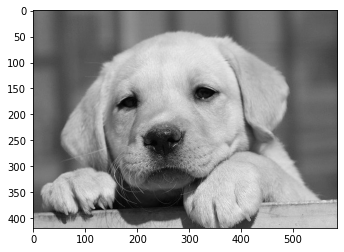

In [4]:
puppy_image = plt.imread('puppy_gray.png')
plt.imshow(puppy_image, cmap='gray')
plt.show()

#### **Follow the instructions in each section:**

___
### Part 1 – DFT Properties
___

Use the supplied function *dft_demo()* :

In [5]:
def dft_demo():
    # Demonstration of effect of the "fftshift" command on the amplitude and on the spectrum of the image.
    #-----------------------------------------------------------------------------------------------------#
    N1 = 100; N2=100; M1=20; M2=20
    A = np.zeros([N1,N2])
    A[(N1-M1)//2:(N1+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    B = np.fft.fft2(A)
    log_magnitude_B= 20*np.log(np.abs(B)+1) # add 1 - in order to prevent log(0)
    B_fftshift=np.fft.fftshift(B)
    log_magnitude_B_fftshift= 20*np.log(np.abs(B_fftshift)+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('The original image'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B, cmap='gray')
    ax[1].set_title('|DFT(a)| [dB]')
    ax[2].imshow(log_magnitude_B_fftshift, cmap='gray')
    ax[2].set_title('|DFT(a)| [dB] + fftshift')
    plt.tight_layout()
    
    # Linearity - 3 demonstrations (two horizontal boxes, two vertical boxes and four boxes)
    #----------------------------------------------------------------------------------------------------#
    # Two horizontal boxes
    delta=40
    A2_hor=np.zeros([N1,N2])
    A2_hor[(N1-M1)//2:(N1+M1)//2,(N2-delta-M2)//2:(N2-delta+M2)//2]=255
    A2_hor[(N1-M1)//2:(N1+M1)//2,(N2+delta-M2)//2:(N2+delta+M2)//2]=255
    B2_hor=np.fft.fft2(A2_hor)
    B2_hor_magnitude = 20*np.log(np.abs(np.fft.fftshift(B2_hor))+1)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('One box'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B_fftshift, cmap='gray')
    ax[1].set_title('|DFT{One box}| [dB]')
    ax[2].imshow(A2_hor, cmap='gray')
    ax[2].set_title('Two horizontal boxes'), ax[2].axis('off')
    ax[3].imshow(B2_hor_magnitude, cmap='gray')
    ax[3].set_title('|DFT{Two horizontal boxes}|[dB]')
    plt.tight_layout()
    
    # Two vertical boxes
    A2_ver=np.zeros([N1,N2])
    A2_ver[(N1-delta-M1)//2:(N1-delta+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    A2_ver[(N1+delta-M1)//2:(N1+delta+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    B2_ver=np.fft.fft2(A2_ver)
    B2_ver_magnitude = 20*np.log(np.abs(np.fft.fftshift(B2_ver))+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A2_ver, cmap='gray')
    ax[0].set_title('Two vertical boxes'), ax[0].axis('off')
    ax[1].imshow(B2_ver_magnitude, cmap='gray')
    ax[1].set_title('|DFT{Two vertical boxes}|[dB]')
    plt.tight_layout()
    
    # Four boxes
    A4=np.zeros([N1,N2])
    A4[(N1-delta-M1)//2:(N1-delta+M1)//2,(N2-delta-M2)//2:(N2-delta+M2)//2]=255
    A4[(N1+delta-M1)//2:(N1+delta+M1)//2,(N2-delta-M2)//2:(N2-delta+M2)//2]=255
    A4[(N1-delta-M1)//2:(N1-delta+M1)//2,(N2+delta-M2)//2:(N2+delta+M2)//2]=255
    A4[(N1+delta-M1)//2:(N1+delta+M1)//2,(N2+delta-M2)//2:(N2+delta+M2)//2]=255
    B4=np.fft.fft2(A4)
    B4_magnitude = 20*np.log(np.abs(np.fft.fftshift(B4))+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A4, cmap='gray')
    ax[0].set_title('Four boxes'), ax[0].axis('off')
    ax[1].imshow(B4_magnitude, cmap='gray')
    ax[1].set_title('|DFT{Four boxes}|[dB]')
    plt.tight_layout()
    
    # Scaling (reduction and enlargement)
    #----------------------------------------------------------------------------------------------------#
    # Reduction
    M1_small=10; M2_small=10
    A_small = np.zeros([N1,N2])
    A_small[(N1-M1_small)//2:(N1+M1_small)//2,(N2-M2_small)//2:(N2+M2_small)//2]=255
    B_small = np.fft.fft2(A_small)
    log_magnitude_B_small= 20*np.log(np.abs(np.fft.fftshift(B_small))+1)
    
    # Enlargement
    M1_large=40; M2_large=40
    A_large = np.zeros([N1,N2])
    A_large[(N1-M1_large)//2:(N1+M1_large)//2,(N2-M2_large)//2:(N2+M2_large)//2]=255
    B_large = np.fft.fft2(A_large)
    log_magnitude_B_large= 20*np.log(np.abs(np.fft.fftshift(B_large))+1)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A_small, cmap='gray')
    ax[0].set_title('Reduced image'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B_small, cmap='gray')
    ax[1].set_title('|DFT{Reduced A}| [dB]')
    ax[2].imshow(A_large, cmap='gray')
    ax[2].set_title('Enlarged image'), ax[2].axis('off')
    ax[3].imshow(log_magnitude_B_large, cmap='gray')
    ax[3].set_title('|DFT{Enlarged A}|[dB]')
    plt.tight_layout()
    
    # Rotation
    #----------------------------------------------------------------------------------------------------#
    theta = 45 #in degrees
    A_rotate = transform.rotate(A, angle=theta)
    B_rotate = np.fft.fft2(A_rotate)
    log_magnitude_B_rotate= 20*np.log(np.abs(np.fft.fftshift(B_rotate))+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A_rotate, cmap='gray')
    ax[0].set_title('Rotated image'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B_rotate, cmap='gray')
    ax[1].set_title('|DFT{Rotated A}|[dB]')
    plt.tight_layout()

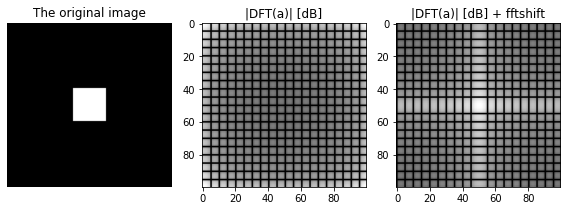

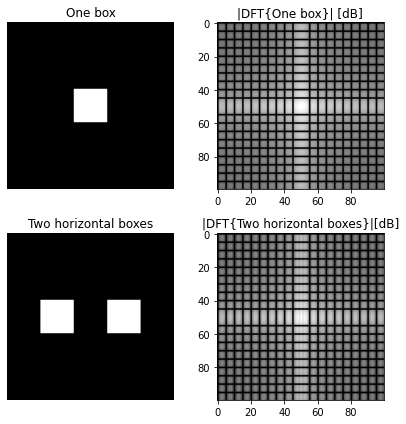

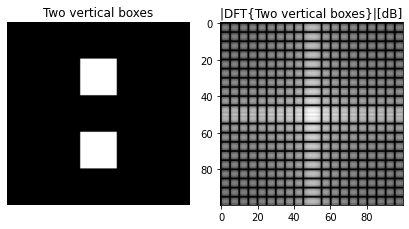

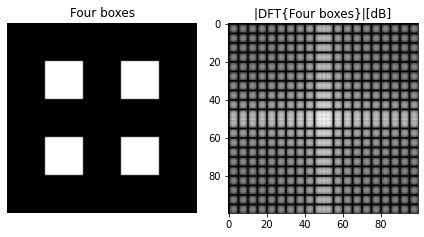

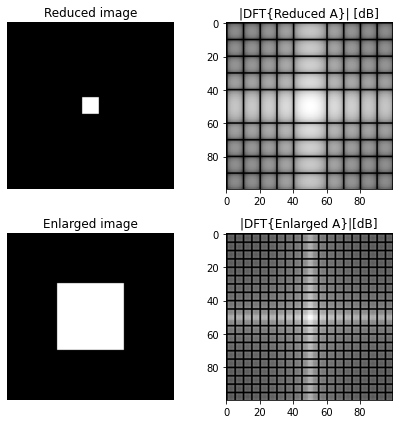

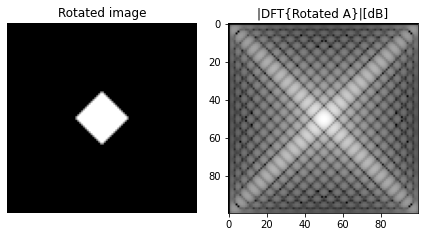

In [6]:
dft_demo()

* Observe the following properties and demonstrations from the *dft_demo()*:
  * fftshift command.
  * Linearity.
  * Scaling.
  * Rotation.
  
Add a short explanation of each of the observations above.

fftshift:
we know that the DFT is symetrical around the zero frequecy but when calculating the FFT the output can be shifted. in order to shift the zero frequecy back to the center of of the matrix, fftshift  swaps half-spaces meaning it will move exactly half of the pixels allong each axis so that the lowest value (in absolute terms) is in the center.
so in the example we can see a peak in the center after shifting. this is due to the properties of the sinc function which we will explain later

Linearity: 
since DFT is a linear transformation and periodic it will be invariant to shifts meaning DFT(I+ U) = DFT(I) + DFT(U)
adding boxes that are symetrical have a constant period between them means the DFT will be the same bewteen. however if we break the peroidicity of the image we no longer get the same frequency domain represintation

example:

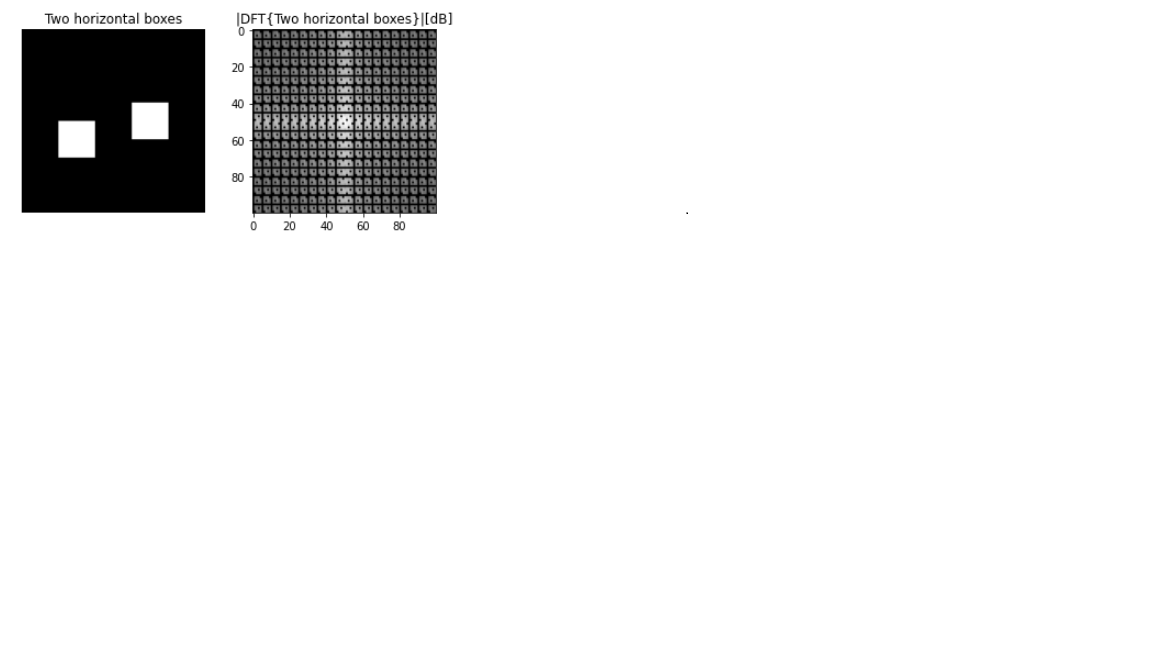
Scaling:

previously we eluded to the fact that a white box is just the rect function in 2D, the FT of the rect function is sinc((W/2)*x) where W is the width (or if this was a signal in time the time period. this means that a larger box will result in a higher frequency sinc. which is exactly what we see.

Rotation: 
X and Y direction is an image are arbitrary and as we can see we get the same frequency response rotated 45 degrees, however since the output must fit in the original image shape the response is croped along the x and y axis.


* Represent the DFT transform of the image of your choice.   
  Show the 3 following plots: Your image, the regular transformation without *fftshift* and transformation with the *fftshift* function.

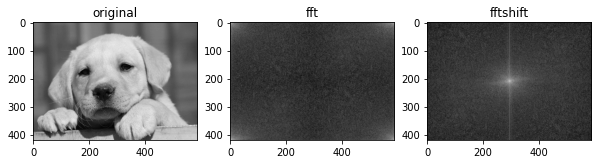

In [7]:
fft_puppy = np.fft.fft2(puppy_image)
fft_puppy_mag= 20*np.log(np.abs(fft_puppy)+1)
fftshift_puppy=np.fft.fftshift(fft_puppy)
fftshift_puppy_mag = 20*np.log(np.abs(fftshift_puppy)+1)

fig , axis = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
axis[0].set_title("original")
axis[0].imshow(puppy_image,cmap='gray')
axis[1].set_title("fft")
axis[1].imshow(fft_puppy_mag,cmap='gray')
axis[2].set_title("fftshift")
axis[2].imshow(fftshift_puppy_mag,cmap='gray')



* Test the following properties with your image:
  * Scaling: factors - **½ and 2** 
  * Rotation: by **30 and 45 degrees**   
  
   __Note__: for your image the scaling property should be implemented differently than in the demo (you can use the function *transform.rescale*). Also, use zero padding for your image presentation.

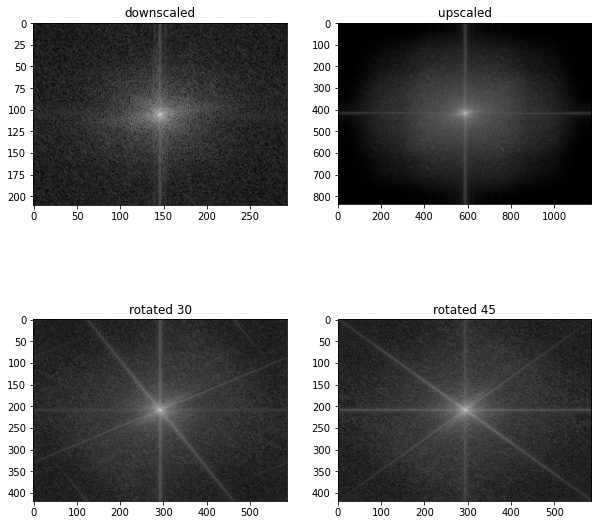

In [8]:
def fft_mag_shift(image):
  return 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))) + 1)

downscaled_puppy = transform.rescale(puppy_image,0.5,order=1,mode='constant',cval=0)
upscaled_puppy = transform.rescale(puppy_image,2,order=1,mode='constant',cval=0)
rotated_30_puppy = transform.rotate(puppy_image,30)
rotated_45_puppy = transform.rotate(puppy_image,45)

downscaled_fft = fft_mag_shift(downscaled_puppy)
upscaled_fft = fft_mag_shift(upscaled_puppy)
rotated_30_fft = fft_mag_shift(rotated_30_puppy)
rotated_45_fft = fft_mag_shift(rotated_45_puppy)

fig , axis = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axis[0,0].set_title("downscaled")
axis[0,0].imshow(downscaled_fft,cmap='gray')
axis[0,1].set_title("upscaled")
axis[0,1].imshow(upscaled_fft,cmap='gray')
axis[1,0].set_title("rotated 30")
axis[1,0].imshow(rotated_30_fft,cmap='gray')
axis[1,1].set_title("rotated 45")
axis[1,1].imshow(rotated_45_fft,cmap='gray')

* Use the supplied function to exchange between the magnitude and phase of two images of your choice.  
   __Note__: both of the images needed to be with the same shape, resize or crop one of the images if it is necessary.

In [9]:
# Exchange between magnitude and phase
def mag_phas_exchange(img1,img2):
    img1_spectrum = np.fft.fft2(img1)
    img1_magnitude = np.abs(img1_spectrum)
    img1_phase = np.angle(img1_spectrum)
    img2_spectrum = np.fft.fft2(img2)
    img2_magnitude = np.abs(img2_spectrum)
    img2_phase = np.angle(img2_spectrum)

    # Magnitude of img1, phase of img2
    img1_img2_spectrum = img1_magnitude * np.exp(1j*img2_phase)
    img1_img2 = np.abs(np.fft.ifft2(img1_img2_spectrum))
    
    # Magnitude of img2, phase of img1
    img2_img1_spectrum = img2_magnitude * np.exp(1j*img1_phase)
    img2_img1 = np.abs(np.fft.ifft2(img2_img1_spectrum))
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
    ax = axes.ravel()
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('Img1'), ax[0].axis('off')
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('Img2'), ax[1].axis('off')
    ax[2].imshow(img2_img1, cmap='gray')
    ax[2].set_title('Magnitude of img2, phase of img1'), ax[2].axis('off')
    ax[3].imshow(img1_img2, cmap='gray')
    ax[3].set_title('Magnitude of img1, phase of img2'), ax[3].axis('off')
    plt.tight_layout()



___
### Part 2 – Convolution
___

Use the supplied function *conv_demo*.   
The function demonstrate the computation of convolution using 2 methods:
1. direct method (in spatial domain).
2. indirect method (in frequency domain).

In [10]:
def conv_demo():
    #----The computation of convolution by direct method (in spatial domain)
    N1 = 100; N2=100; M1=30; M2=30
    A = np.zeros([N1,N2])
    A[(N1-M1)//2:(N1+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    blur_kernel = (1.0/36)*np.ones((6,6))
    img_blurred_using_spatial = signal.convolve2d(A,blur_kernel)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))
    ax = axes.ravel()
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('The original image'), ax[0].axis('off')
    ax[1].imshow(img_blurred_using_spatial, cmap='gray')
    ax[1].set_title('The blurred image'), ax[1].axis('off')
    plt.tight_layout() 

    #---The computation of convolution by indirect method (in frequency domain)
    N = A.shape[0]+blur_kernel.shape[0]
    M = A.shape[1]+blur_kernel.shape[1]
    img_spectrum=np.fft.fftshift(np.fft.fft2(A,s=(N,M)))
    blur_kernel_spectrum=np.fft.fftshift(np.fft.fft2(blur_kernel,s=(N,M)))
    img_blurred_spectrum=img_spectrum*blur_kernel_spectrum
    img_blurred_using_dft=np.abs(np.fft.ifft2(img_blurred_spectrum))
    
    

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
    axes.imshow(A, cmap='gray')
    axes.set_title('The original image'), axes.axis('off')
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(20*np.log(np.abs(img_spectrum)+1), cmap='gray')
    ax[0].set_title('Spectrum of orig. image'), ax[0].axis('off')
    ax[1].imshow(20*np.log(np.abs(blur_kernel_spectrum)+1), cmap='gray')
    ax[1].set_title('Spectrum of blur. kernel'), ax[1].axis('off')
    ax[2].imshow(20*np.log(np.abs(img_blurred_spectrum)+1), cmap='gray')
    ax[2].set_title('Spectrum of blur. image'), ax[2].axis('off')
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
    axes.imshow(img_blurred_using_dft, cmap='gray')
    axes.set_title('Blurred image'), axes.axis('off')

* Observe the results of convolution with those two methods (in spatial domain and in frequency domain).

* Test the implementation of convolution with those two methods on image of your choice.   
    Observe your results.  

* Implement convolution with median filter using python’s *ndimage.median_filter* and uniform filter by using *ndimage.uniform_filter*.    
    Explain the difference between your results.

* Observe the Fourier Transform of the filters in the given demo.   
    Determine which filter are high pass filters and which are low pass filters.

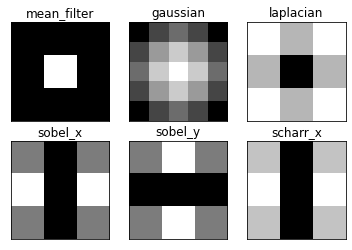

In [11]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,0.5)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

__Bonus__: Implement the following filters with the image of your choice.

___
### Part 3 – Unsharp masking
___

Use the supplied function *unsharp_masking_demo*.
*	Test the function with the image of your choice. Optimize lambda1 and lambda2 for your image.
*	Explain the two different sharpening techniques used in the demo and your results.

In [12]:
def unsharp_masking_demo(img):
    # Obtain blurred image using convolution in spatial domain
    blur_kernel = (1.0/36)*np.ones((6,6))
    img_blurred = transform.resize(signal.convolve2d(img,blur_kernel),(img.shape[0],img.shape[1]))
    
    # Perform unsharp masking using Laplacian filter 
    lambda1=0.3; lambda2=1.2
    img_laplace = cv2.Laplacian(img,cv2.CV_64F)
    img_enhanced_edges = img-lambda1*img_laplace

    # Perform unsharp masking using the low pass filtered  image  with parameter lambda2. 
    img_unsharp= img+lambda2*(img-img_blurred)

    # Display the results
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(img, vmin=0,vmax=255,cmap='gray')
    ax[0].set_title('Original image'), ax[0].axis('off')
    ax[1].imshow(img_blurred,vmin=0,vmax=255, cmap='gray')
    ax[1].set_title('Blurred image'), ax[1].axis('off')
    ax[2].imshow(img_enhanced_edges, vmin=0,vmax=255, cmap='gray')
    ax[2].set_title('Image after laplacian edge enhancement'), ax[2].axis('off')
    ax[3].imshow(img_unsharp, vmin=0,vmax=255,cmap='gray')
    ax[3].set_title('Image after low pass based unsharp masking'), ax[3].axis('off')
    plt.tight_layout()

* Implement unsharp masking using python’s function *skimage.filters.unsharp_mask*   